In [33]:
import kagglehub
import pandas as pd

In [3]:
path = kagglehub.dataset_download("mitchellharrison/my-first-1000-valorant-games")
print("Path to dataset files:", path)

Path to dataset files: /home/kng/.cache/kagglehub/datasets/mitchellharrison/my-first-1000-valorant-games/versions/1


In [56]:
df = pd.read_csv("data/valorant_games.csv", header=0)
df.set_index("game_id")
del df["episode"]
del df["act"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   game_id        1000 non-null   int64  
 1   rank           1000 non-null   object 
 2   date           1000 non-null   object 
 3   agent          1000 non-null   object 
 4   map            1000 non-null   object 
 5   outcome        1000 non-null   object 
 6   round_wins     1000 non-null   int64  
 7   round_losses   1000 non-null   int64  
 8   kills          1000 non-null   int64  
 9   deaths         1000 non-null   int64  
 10  assists        1000 non-null   int64  
 11  kdr            1000 non-null   float64
 12  avg_dmg_delta  1000 non-null   int64  
 13  headshot_pct   1000 non-null   int64  
 14  avg_dmg        1000 non-null   int64  
 15  acs            1000 non-null   int64  
 16  num_frag       1000 non-null   int64  
dtypes: float64(1), int64(11), object(5)
memory usage: 132

In [57]:
df.describe()

,game_id,round_wins,round_losses,kills,deaths,assists,kdr,avg_dmg_delta,headshot_pct,avg_dmg,acs,num_frag
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,10.589000,10.52700,15.299000,14.249000,4.656000,1.178400,10.308000,22.763000,134.446000,205.382000,2.990000
std,288.819436,3.359966,3.55273,5.253113,3.724362,2.656072,0.656784,43.383791,9.919033,35.199916,56.539958,1.368127
min,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.200000,-124.000000,2.000000,42.000000,59.000000,1.000000
25%,250.750000,8.000000,8.00000,12.000000,13.000000,3.000000,0.800000,-20.000000,15.000000,110.000000,166.000000,2.000000
50%,500.500000,13.000000,13.00000,15.000000,15.000000,4.000000,1.100000,9.000000,22.000000,133.000000,203.000000,3.000000
75%,750.250000,13.000000,13.00000,19.000000,17.000000,6.000000,1.400000,39.000000,29.000000,157.000000,240.000000,4.000000
max,1000.000000,18.000000,20.00000,35.000000,26.000000,20.000000,9.700000,293.000000,63.000000,373.000000,572.000000,5.000000


In [17]:
print("Rank distribution:")
df.value_counts("rank")


Rank distribution:


rank
Ascendant 1    179
Diamond 3      153
Diamond 1      126
Platinum 3     111
Gold 3          93
Diamond 2       78
Platinum 1      66
Ascendant 2     57
Platinum 2      48
Gold 2          24
Placement       24
Gold 1          17
Silver 2        17
Silver 3         7
Name: count, dtype: int64

In [8]:
df.value_counts("outcome")

outcome
Loss    497
Win     491
Draw     12
Name: count, dtype: int64

In [20]:
df["num_frag"].value_counts()

num_frag
2    225
4    209
3    207
5    181
1    178
Name: count, dtype: int64

In [55]:
print("KDR:")
print(df["kdr"].mean())
print("Average damage:")
print(df["avg_dmg"].mean())
print("Average damage delta:")
print(df["avg_dmg_delta"].mean())
print("Assists:")
print(df["assists"].mean())

KDR:
1.1784
Average damage:
134.446
Average damage delta:
10.308
Assists:
4.656


In [42]:
df[["kills", "deaths"]].sum()

kills     15299
deaths    14249
dtype: int64

Kills/Deaths: in thousands


/home/kng/anaconda3/envs/ds-env1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kng/anaconda3/envs/ds-env1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: >

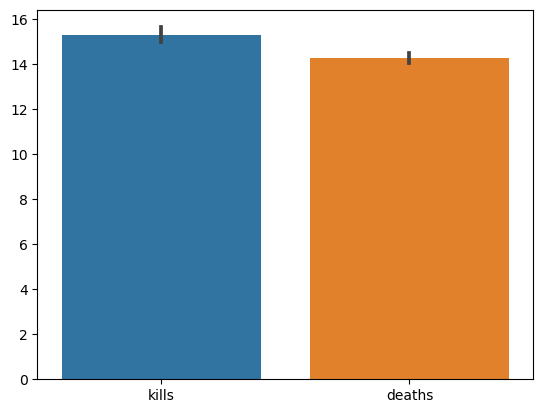

In [49]:
print("Kills/Deaths: in thousands")
sns.barplot(df[["kills", "deaths"]])